# Chapter 3 - Exercise

This sample notebook is intended to get you started on analyzing the Amazon's open-source [**MASSIVE** dataset](https://www.amazon.science/blog/amazon-releases-51-language-dataset-for-language-understanding), available for [download](https://amazon-massive-nlu-dataset.s3.amazonaws.com/amazon-massive-dataset-1.0.tar.gz) at https://github.com/alexa/massive. Complete the remaining notebook to train a NLP anomaly detector for intent classification and explore its explainability.

You can experiment with this example on [Amazon SageMaker Studio Lab](https://aws.amazon.com/sagemaker/studio-lab/), a free ML development environment that provides up to 12 hours of CPU or 4 hours of GPU per user session and 15GiB storage at no cost. Alternatively, you can try this on your preferred Integrated Development Environment (IDE).

In [2]:
# This dataset contains one million labeled utterances spanning 51 languages. You can replace en-US.jsonl with other language files such as zh-CN.jsonl from the dataset.
import json

with open('en-US.jsonl') as f:
    data = [json.loads(line) for line in f]

In [3]:
data[:3]

[{'id': '0',
  'locale': 'en-US',
  'partition': 'test',
  'scenario': 'alarm',
  'intent': 'alarm_set',
  'utt': 'wake me up at five am this week',
  'annot_utt': 'wake me up at [time : five am] [date : this week]',
  'worker_id': '1'},
 {'id': '1',
  'locale': 'en-US',
  'partition': 'train',
  'scenario': 'alarm',
  'intent': 'alarm_set',
  'utt': 'wake me up at nine am on friday',
  'annot_utt': 'wake me up at [time : nine am] on [date : friday]',
  'worker_id': '1'},
 {'id': '2',
  'locale': 'en-US',
  'partition': 'train',
  'scenario': 'alarm',
  'intent': 'alarm_set',
  'utt': 'set an alarm for two hours from now',
  'annot_utt': 'set an alarm for [time : two hours from now]',
  'worker_id': '1'}]

In [4]:
import pandas as pd

df = pd.DataFrame(data, columns = ['id', 'locale', 'partition', 'scenario', 'intent', 'utt', 'annot_utt', 'worker_id'])

In [5]:
df.head(5)

,id,locale,partition,scenario,intent,utt,annot_utt,worker_id
0,0,en-US,test,alarm,alarm_set,wake me up at five am this week,wake me up at [time : five am] [date : this week],1
1,1,en-US,train,alarm,alarm_set,wake me up at nine am on friday,wake me up at [time : nine am] on [date : friday],1
2,2,en-US,train,alarm,alarm_set,set an alarm for two hours from now,set an alarm for [time : two hours from now],1
3,3,en-US,test,audio,audio_volume_mute,quiet,quiet,1
4,4,en-US,train,audio,audio_volume_mute,olly quiet,olly quiet,1


In [6]:
df.describe()

,id,locale,partition,scenario,intent,utt,annot_utt,worker_id
count,16521,16521,16521,16521,16521,16521,16521,16521
unique,16521,1,3,18,60,16432,16434,691
top,0,en-US,train,calendar,calendar_set,do i have any new email,do i have any new email,0
freq,1,16521,11514,2370,1150,3,3,228


How many samples and classes in this dataset? Answer:

In [7]:
# Unique classes

df['intent'].unique()

array(['alarm_set', 'audio_volume_mute', 'iot_hue_lightchange',
       'iot_hue_lightoff', 'iot_hue_lighton', 'iot_hue_lightdim',
       'iot_cleaning', 'calendar_query', 'play_music', 'general_quirky',
       'general_greet', 'datetime_query', 'datetime_convert',
       'takeaway_query', 'alarm_remove', 'alarm_query', 'news_query',
       'music_likeness', 'music_query', 'iot_hue_lightup',
       'takeaway_order', 'weather_query', 'music_settings',
       'audio_volume_down', 'general_joke', 'music_dislikeness',
       'audio_volume_other', 'iot_coffee', 'audio_volume_up',
       'iot_wemo_on', 'iot_wemo_off', 'qa_stock', 'play_radio',
       'social_post', 'recommendation_locations', 'cooking_recipe',
       'qa_factoid', 'recommendation_events', 'calendar_set',
       'play_audiobook', 'play_podcasts', 'social_query',
       'transport_query', 'email_sendemail', 'transport_ticket',
       'recommendation_movies', 'lists_query', 'play_game', 'email_query',
       'transport_traffic',

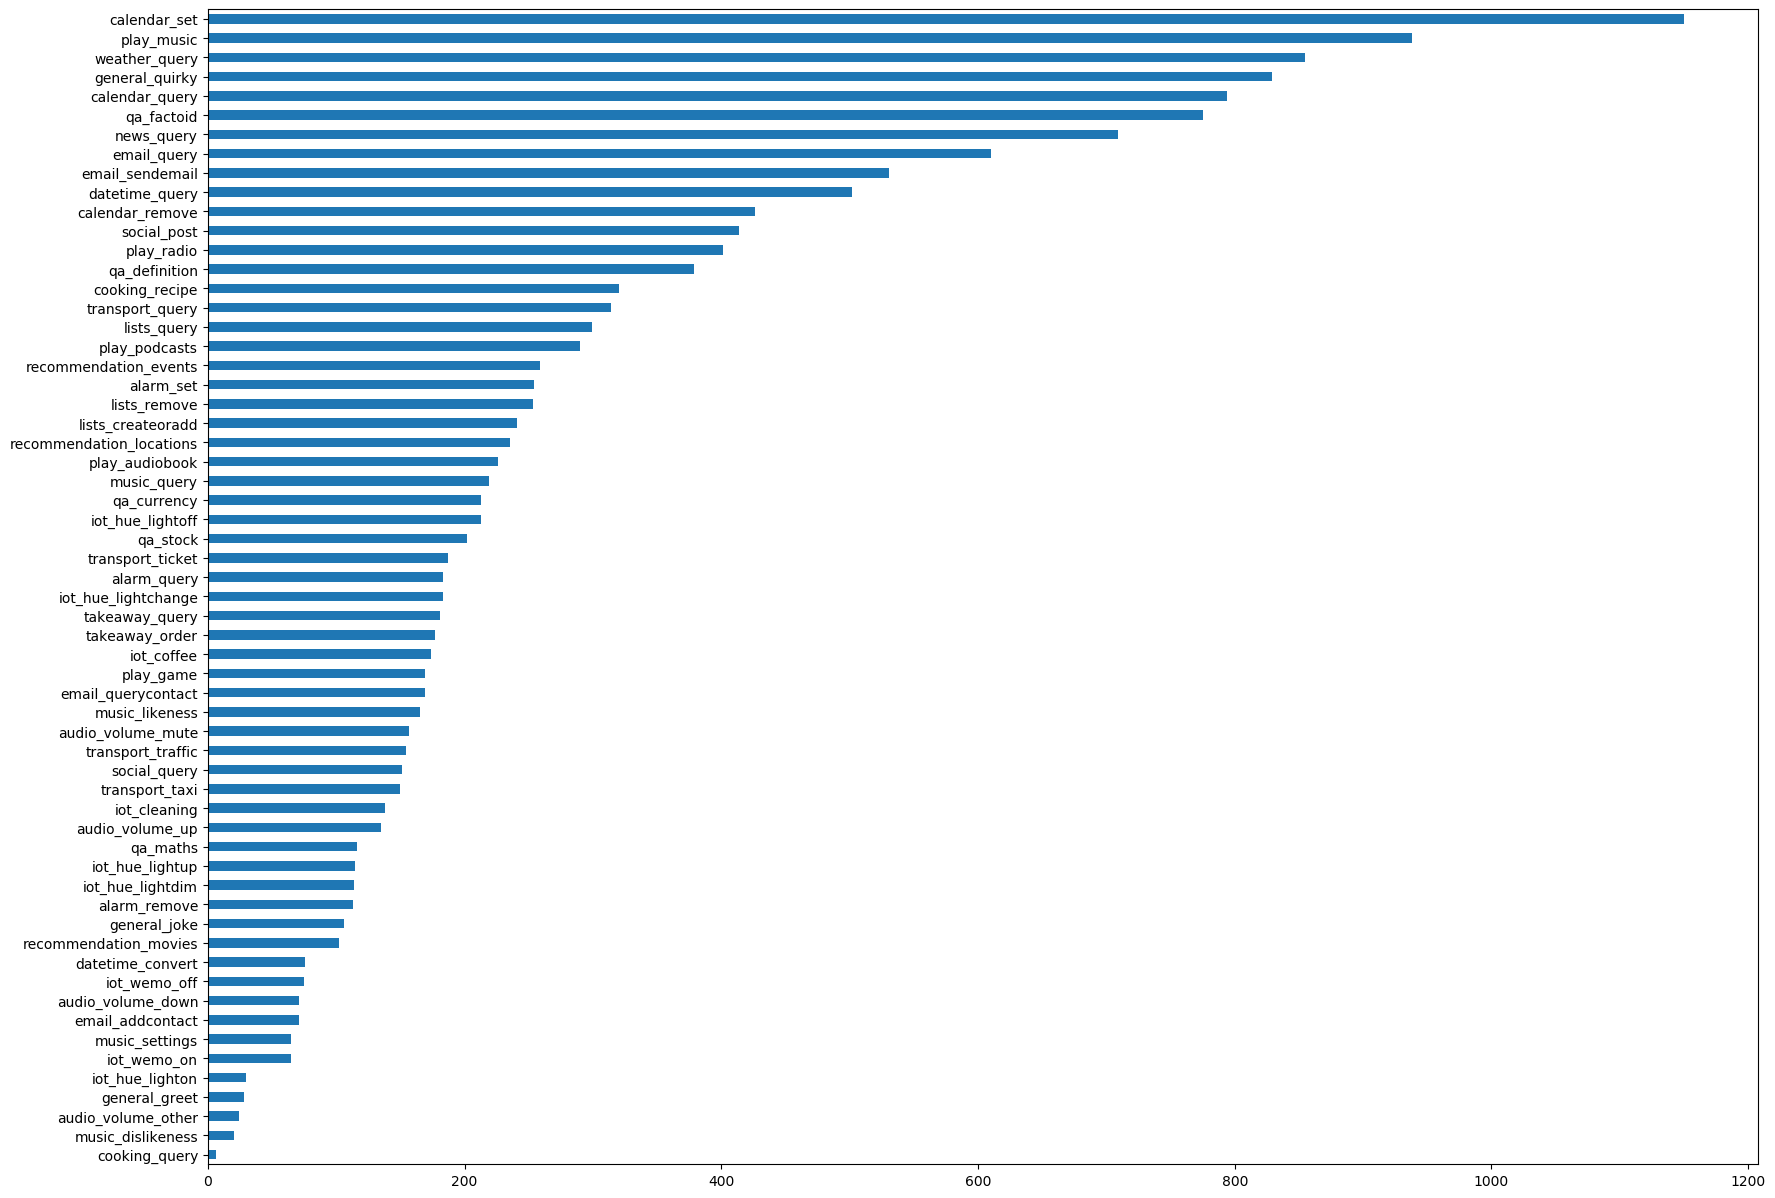

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,15)

df['intent'].value_counts().plot(kind = 'barh').invert_yaxis()

plt.savefig('massive_dist.png', bbox_inches="tight")

In [9]:
# Complete your code here to assess NLP anomaly explainability for MASSIVE






